In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("data2.csv")

In [3]:
df.head()

,Unnamed: 0,time,gen..kW.,House.overall..kW.,Dishwasher..kW.,Furnace.1..kW.,Furnace.2..kW.,Home.office..kW.,Fridge..kW.,Wine.cellar..kW.,...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,0,2016-01-01 00:58:00,0.003417,0.714200,0.000033,0.021083,0.309983,0.043067,0.005167,0.123317,...,10.0,Cloudy,-1.44,1016.25,8.29,0.75,285,0.0,-4.5,0.0
1,1,2016-01-01 00:59:00,0.003417,0.497067,0.000017,0.096983,0.062867,0.043283,0.005000,0.123283,...,10.0,Cloudy,-1.44,1016.25,8.29,0.75,285,0.0,-4.5,0.0
2,2,2016-01-01 01:00:00,0.003450,0.465133,0.000017,0.064500,0.062633,0.043250,0.005017,0.123350,...,10.0,Cloudy,-1.44,1016.25,8.29,0.75,285,0.0,-4.5,0.0
3,3,2016-01-01 01:01:00,0.003417,0.512933,0.000017,0.111333,0.063883,0.043300,0.004967,0.123867,...,10.0,Cloudy,-1.44,1016.25,8.29,0.75,285,0.0,-4.5,0.0
4,4,2016-01-01 01:02:00,0.003417,0.651283,0.000017,0.114583,0.063200,0.043283,0.114167,0.124267,...,10.0,Cloudy,-1.44,1016.25,8.29,0.75,285,0.0,-4.5,0.0


In [4]:
df.columns

Index(['Unnamed: 0', 'time', 'gen..kW.', 'House.overall..kW.',
       'Dishwasher..kW.', 'Furnace.1..kW.', 'Furnace.2..kW.',
       'Home.office..kW.', 'Fridge..kW.', 'Wine.cellar..kW.',
       'Garage.door..kW.', 'Kitchen.12..kW.', 'Kitchen.14..kW.',
       'Kitchen.38..kW.', 'Barn..kW.', 'Well..kW.', 'Microwave..kW.',
       'Living.room..kW.', 'temperature', 'icon', 'humidity', 'visibility',
       'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability'],
      dtype='object')

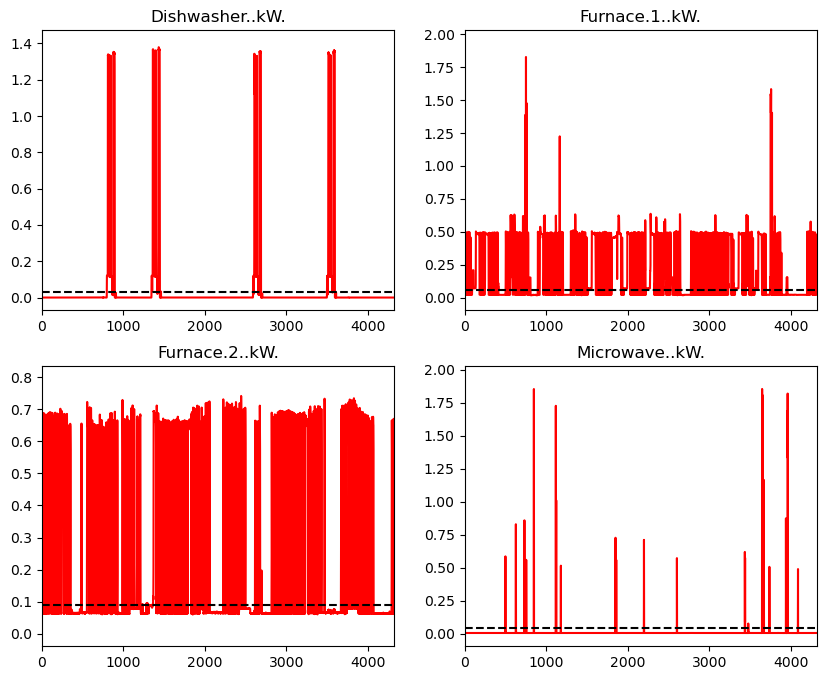

In [5]:
umbrals = ["Dishwasher..kW.","Furnace.1..kW.","Furnace.2..kW.","Microwave..kW."]
fig, ((ax0,ax1),(ax2,ax3)) = plt.subplots(2,2, figsize=(10,8))
plots = dict(zip(umbrals,[ax0,ax1,ax2,ax3]))
alturas = dict(zip(umbrals, [0.03,0.06,0.09,0.04]))
for u,p in plots.items():
    p.plot(df[u], color="red")
    p.axhline(alturas[u], color='black', linestyle='--')
    p.set_title(u)
    p.set_xlim([0,24*60*3])
plt.savefig("thresholds.png", bbox_inches='tight')
plt.show()

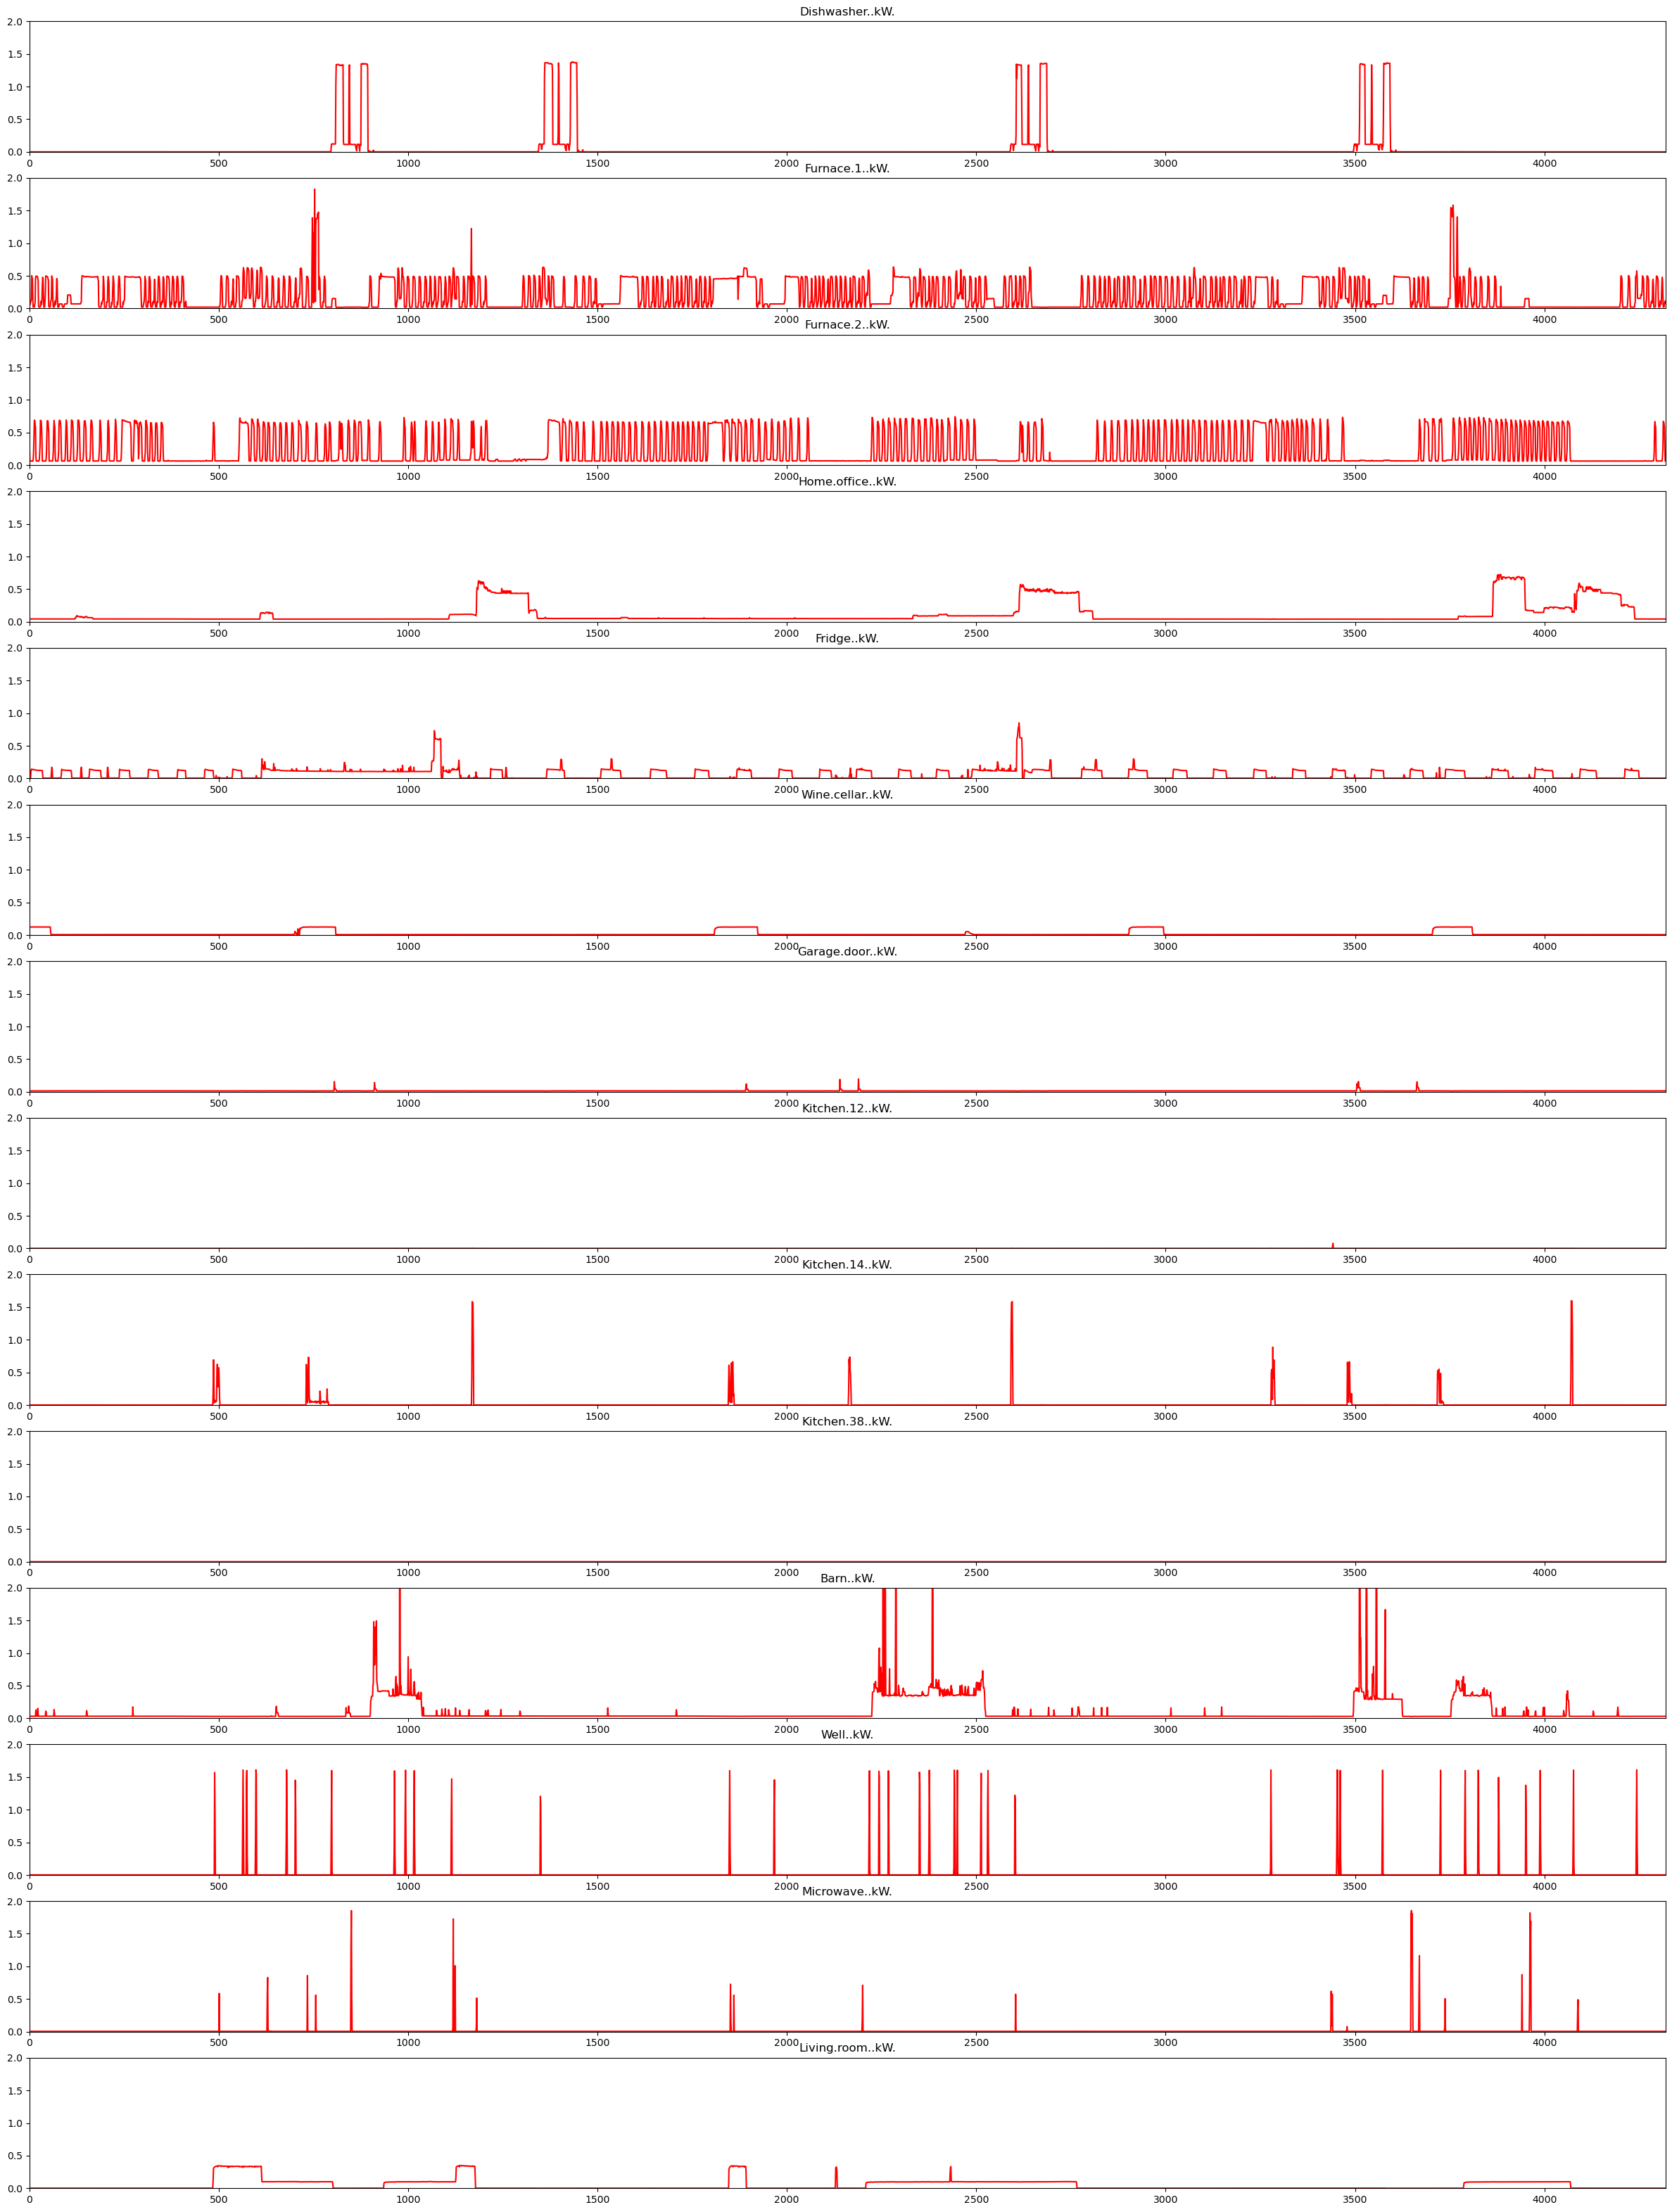

In [6]:
umbrals = ['Dishwasher..kW.', 'Furnace.1..kW.', 'Furnace.2..kW.',
       'Home.office..kW.', 'Fridge..kW.', 'Wine.cellar..kW.',
       'Garage.door..kW.', 'Kitchen.12..kW.', 'Kitchen.14..kW.',
       'Kitchen.38..kW.', 'Barn..kW.', 'Well..kW.', 'Microwave..kW.',
       'Living.room..kW.']
fig, axes = plt.subplots(len(umbrals),1, figsize=(30,40))
plots = dict(zip(umbrals,axes))
alturas = dict(zip(umbrals, [None]*len(umbrals)))
for u,p in plots.items():
    p.plot(df[u], color="red")
    #p.axhline(alturas[u], color='black', linestyle='--')
    p.set_title(u)
    p.set_xlim([0,24*60*3])
    p.set_ylim([0,2])
plt.savefig("thresholds.png", bbox_inches='tight')
plt.show()

In [7]:
alturas

{'Dishwasher..kW.': None,
 'Furnace.1..kW.': None,
 'Furnace.2..kW.': None,
 'Home.office..kW.': None,
 'Fridge..kW.': None,
 'Wine.cellar..kW.': None,
 'Garage.door..kW.': None,
 'Kitchen.12..kW.': None,
 'Kitchen.14..kW.': None,
 'Kitchen.38..kW.': None,
 'Barn..kW.': None,
 'Well..kW.': None,
 'Microwave..kW.': None,
 'Living.room..kW.': None}

In [8]:
df["Furnace"] = df["Furnace.1..kW."] + df["Furnace.2..kW."]
df["Kitchen"] = df["Kitchen.12..kW."] + df["Kitchen.14..kW."] + df["Kitchen.38..kW."]
umbrals = ['Dishwasher..kW.', 'Furnace',
       'Home.office..kW.', 'Fridge..kW.', 'Wine.cellar..kW.',
       'Garage.door..kW.', 'Kitchen', 'Barn..kW.', 'Well..kW.', 'Microwave..kW.',
       'Living.room..kW.']
alturas = dict(zip(umbrals, [None]*len(umbrals)))

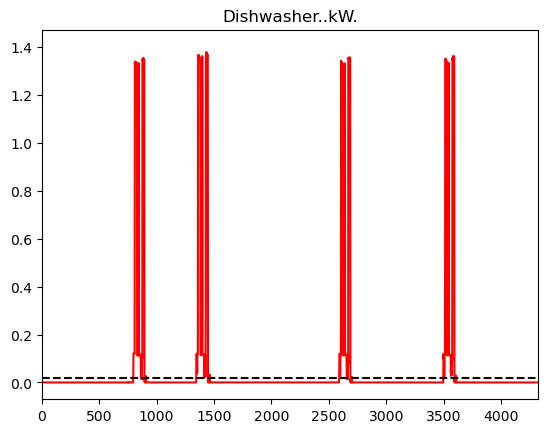

In [9]:
# 0 Dishwasher
n = 0
u = umbrals[n]
alturas[u] = 0.02
a = alturas[u]
plt.plot(df[u], color="red")
plt.axhline(alturas[u], color='black', linestyle='--')
plt.title(u)
plt.xlim([0,24*60*3])
plt.show()

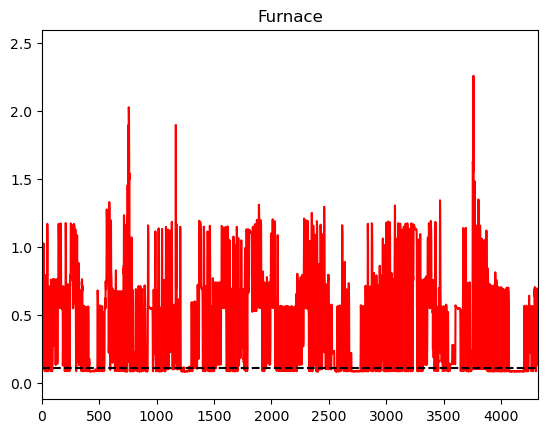

In [10]:
# 1 Furnace
n = 1
u = umbrals[n]
alturas[u] = 0.11
a = alturas[u]
plt.plot(df[u], color="red")
plt.axhline(alturas[u], color='black', linestyle='--')
plt.title(u)
plt.xlim([0,24*60*3])
plt.show()

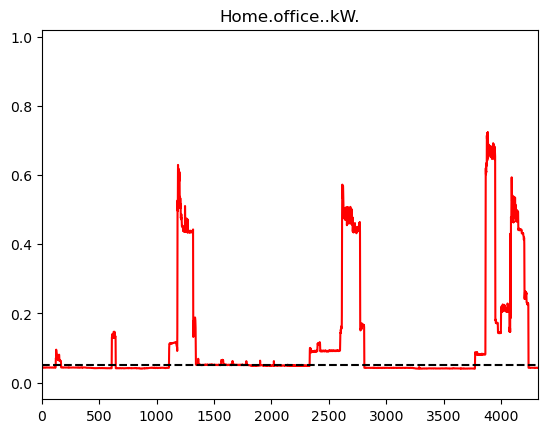

In [11]:
# 2 Home office
n = 2
u = umbrals[n]
alturas[u] = 0.05
a = alturas[u]
plt.plot(df[u], color="red")
plt.axhline(alturas[u], color='black', linestyle='--')
plt.title(u)
plt.xlim([0,24*60*3])
plt.show()

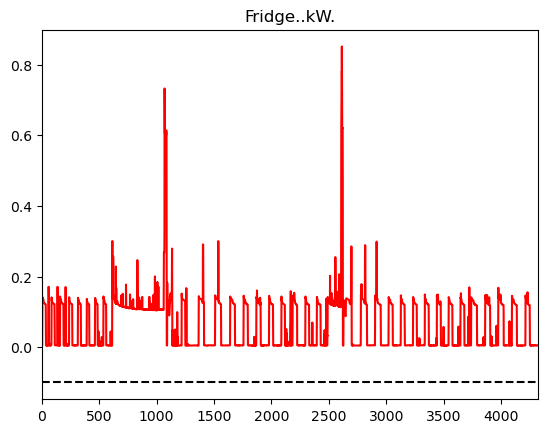

In [12]:
# 3 Fridge
n = 3
u = umbrals[n]
alturas[u] = -0.1
a = alturas[u]
plt.plot(df[u], color="red")
plt.axhline(alturas[u], color='black', linestyle='--')
plt.title(u)
plt.xlim([0,24*60*3])
plt.show()

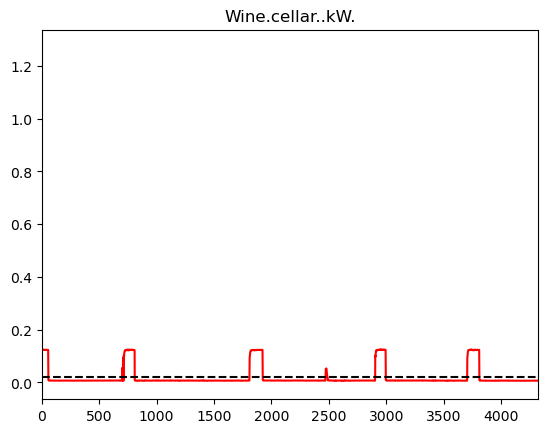

In [13]:
# 4 Wine cellar
n = 4
u = umbrals[n]
alturas[u] = 0.02
a = alturas[u]
plt.plot(df[u], color="red")
plt.axhline(alturas[u], color='black', linestyle='--')
plt.title(u)
plt.xlim([0,24*60*3])
plt.show()

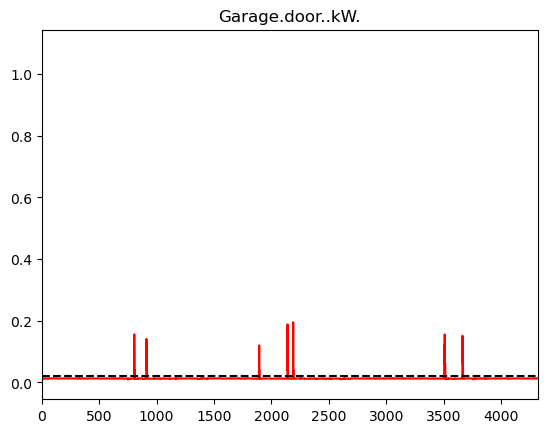

In [14]:
# 5 Garage Door
n = 5
u = umbrals[n]
alturas[u] = 0.02
a = alturas[u]
plt.plot(df[u], color="red")
plt.axhline(alturas[u], color='black', linestyle='--')
plt.title(u)
plt.xlim([0,24*60*3])
plt.show()

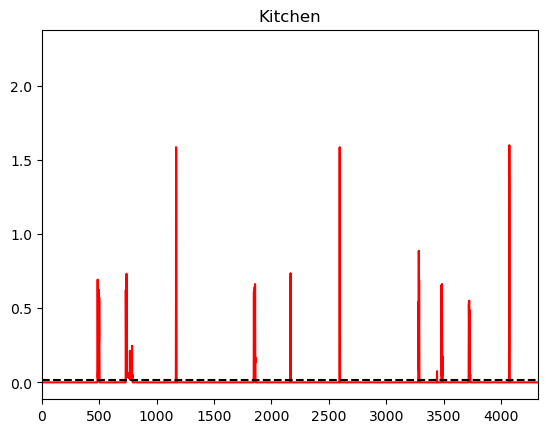

In [15]:
# 6 Fridge
n = 6
u = umbrals[n]
alturas[u] = 0.02
a = alturas[u]
plt.plot(df[u], color="red")
plt.axhline(alturas[u], color='black', linestyle='--')
plt.title(u)
plt.xlim([0,24*60*3])
plt.show()

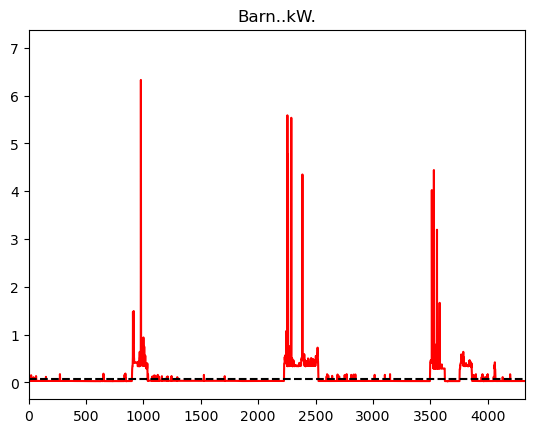

In [16]:
# 7 Barn
n = 7
u = umbrals[n]
alturas[u] = 0.07
a = alturas[u]
plt.plot(df[u], color="red")
plt.axhline(alturas[u], color='black', linestyle='--')
plt.title(u)
plt.xlim([0,24*60*3])
plt.show()

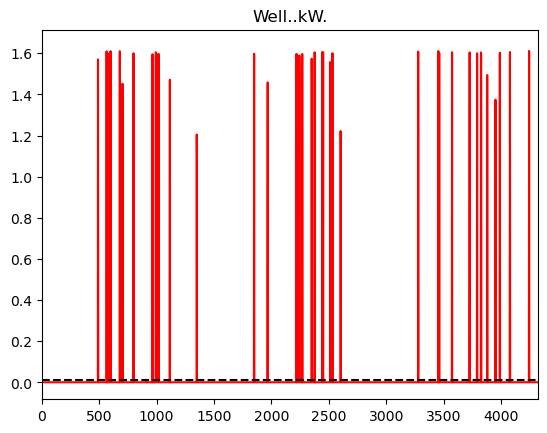

In [17]:
# 8 Well
n = 8
u = umbrals[n]
alturas[u] = 0.01
a = alturas[u]
plt.plot(df[u], color="red")
plt.axhline(alturas[u], color='black', linestyle='--')
plt.title(u)
plt.xlim([0,24*60*3])
plt.show()

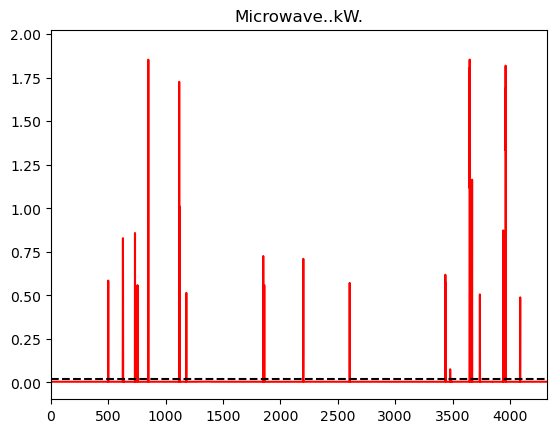

In [18]:
# 1 Microwave
n = 9
u = umbrals[n]
alturas[u] = 0.02
a = alturas[u]
plt.plot(df[u], color="red")
plt.axhline(alturas[u], color='black', linestyle='--')
plt.title(u)
plt.xlim([0,24*60*3])
plt.show()

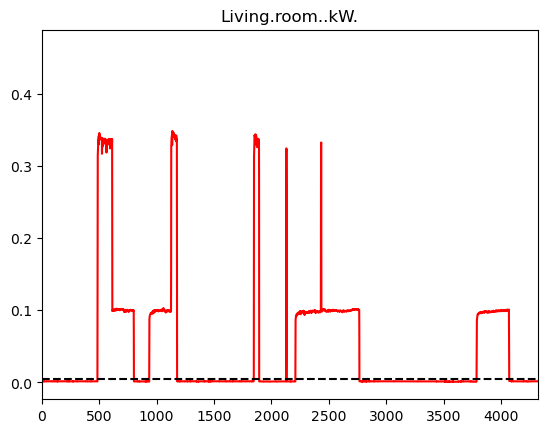

In [19]:
# 1 Living Room
n = 10
u = umbrals[n]
alturas[u] = 0.005
a = alturas[u]
plt.plot(df[u], color="red")
plt.axhline(alturas[u], color='black', linestyle='--')
plt.title(u)
plt.xlim([0,24*60*3])
plt.show()

In [20]:
for m,u in alturas.items():
    df[m+"ON"] = (df[m] > u).astype(int)
df.head()

,Unnamed: 0,time,gen..kW.,House.overall..kW.,Dishwasher..kW.,Furnace.1..kW.,Furnace.2..kW.,Home.office..kW.,Fridge..kW.,Wine.cellar..kW.,...,FurnaceON,Home.office..kW.ON,Fridge..kW.ON,Wine.cellar..kW.ON,Garage.door..kW.ON,KitchenON,Barn..kW.ON,Well..kW.ON,Microwave..kW.ON,Living.room..kW.ON
0,0,2016-01-01 00:58:00,0.003417,0.714200,0.000033,0.021083,0.309983,0.043067,0.005167,0.123317,...,1,0,1,1,0,0,0,0,0,0
1,1,2016-01-01 00:59:00,0.003417,0.497067,0.000017,0.096983,0.062867,0.043283,0.005000,0.123283,...,1,0,1,1,0,0,0,0,0,0
2,2,2016-01-01 01:00:00,0.003450,0.465133,0.000017,0.064500,0.062633,0.043250,0.005017,0.123350,...,1,0,1,1,0,0,0,0,0,0
3,3,2016-01-01 01:01:00,0.003417,0.512933,0.000017,0.111333,0.063883,0.043300,0.004967,0.123867,...,1,0,1,1,0,0,0,0,0,0
4,4,2016-01-01 01:02:00,0.003417,0.651283,0.000017,0.114583,0.063200,0.043283,0.114167,0.124267,...,1,0,1,1,0,0,0,0,0,0


In [21]:
for u in umbrals:
    print(df[u+"ON"].value_counts())
    print()

Dishwasher..kW.ON
0    478320
1     25532
Name: count, dtype: int64

FurnaceON
0    319072
1    184780
Name: count, dtype: int64

Home.office..kW.ON
0    340847
1    163005
Name: count, dtype: int64

Fridge..kW.ON
1    503852
Name: count, dtype: int64

Wine.cellar..kW.ON
0    325029
1    178823
Name: count, dtype: int64

Garage.door..kW.ON
0    492334
1     11518
Name: count, dtype: int64

KitchenON
0    488433
1     15419
Name: count, dtype: int64

Barn..kW.ON
0    463583
1     40269
Name: count, dtype: int64

Well..kW.ON
0    496833
1      7019
Name: count, dtype: int64

Microwave..kW.ON
0    499315
1      4537
Name: count, dtype: int64

Living.room..kW.ON
0    430260
1     73592
Name: count, dtype: int64



In [22]:
df = df.drop('Fridge..kW.ON', axis=1)

In [ ]:
df.to_csv("data3.csv")